In [1]:
import pinballrt.dust
from pinballrt.dust import Dust, load
import numpy as np
import astropy.units as u
import os

In [2]:
data = np.load(os.path.join(os.path.dirname(pinballrt.dust.__file__), "tests/data/diana_wice.npz"))

d = Dust(lam=data["lam"]*u.cm, kabs=data["kabs"]*u.cm**2/u.g, ksca=data["ksca"]*u.cm**2/u.g, amax=data["amax"]*u.cm, p=data["p"], interpolate=0)

Warp CUDA warning: Could not find or load the NVIDIA CUDA driver. Proceeding in CPU-only mode.
/usr/local/python/3.12.1/lib/python3.12/site-packages/astropy/units/quantity.py:653: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/python/3.12.1/lib/python3.12/site-packages/astropy/units/quantity.py:653: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Warp 1.9.1 initialized:
   CUDA driver not found or failed to initialize
   Devices:
     "cpu"      : "x86_64"
   Kernel cache:
     /home/codespace/.cache/warp/1.9.1


💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type       | Params | Mode 
---------------------------------------------
0 | model | Sequential | 12.0 K | train
---------------------------------------------
12.0 K    Trainable params
0         Non-trainable params
12.0 K    Total params
0.048     Total estimated model params size (MB)
15        Modules in train mode
0         Modules in eval mode


Epoch 9: 100%|██████████| 7200/7200 [03:09<00:00, 38.04it/s, v_num=4, train_loss=0.00282, valid_loss=0.00105]  

`Trainer.fit` stopped: `max_epochs=10` reached.


Testing DataLoader 0: 100%|██████████| 1000/1000 [00:02<00:00, 360.46it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss          0.0010689238552004099
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


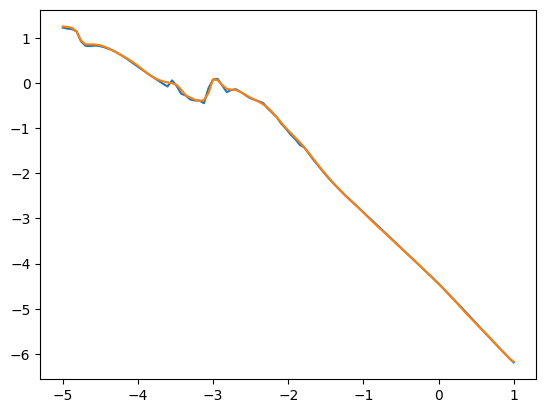

In [5]:
d.learn(model="kabs", nsamples=1000000, max_epochs=10, hidden_units=(48,48,48,48,48,48), plot=True, overwrite=True)

In [ ]:
d.learn(model="ksca", nsamples=100000, max_epochs=10, overwrite=True, plot=True)

In [ ]:
d.learn(model="pmo", nsamples=10000, max_epochs=10, overwrite=True, plot=True)

In [ ]:
d.learn(model="random_nu", nsamples=100000, max_epochs=10, overwrite=True, plot=True)